In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #simpliest scipy fitting method
from scipy.stats.distributions import chi2
import scipy.special as sf # needed for p-value calculation

%matplotlib inline

# Hunt Ectended Formula:
 $$A\exp(-Ct/\lambda^4)\exp(-Bt/\lambda^8)$$

* $A$ is the clarity 
* $B$ is related to the amount of absorption
* $C$ is related to the amount of scattering
* $t$ is the thickness of the tile

### Define a function called HuntExtendFrom that takes as argurment: $\lambda$, $A$, $Bt$, $Ct$, and returns the evaluation of:
### $$A\cdot\exp(-Ct/(\lambda)^4\exp(-Bt/(\lambda)^8)$$

This function has 3 fit paramters $A$, $Ct$, $Bt$, where $Ct$ and $Bt$ have units of $\mu m$

In [125]:
#define the HuntExtendForm function

def Hunt_Extended(W,A,C,B,t): 
    
    return A*np.exp((-C*t/W**4))*np.exp((-B*t)/(W)**8)

# Below are the measurement results

In [128]:
W = np.array([340.45,432.42,520.45,633.77]) #[nm]
W = W*0.001 #convert from nm to um
T = np.array([36.05,69.14,83.91,92.26]) #transmittance results [%]
dT = 0.001*T #error on the transmittance results [%]

# Fit the data
To fit the data we will use the curve_fit function from the SciPy library:
### curve_fit(HuntExtendForm, W, T, p0, sigma=dT, absolute_sigma=True)
Here we use an additional paramter **p0**, which is an array that contains values that the curve_fit function should use as a starting point when optimizing the fit parameters. For our purposes we will start with $A = 1$, $Bt = 0$, and $Ct = 0$.

### Define an initial parameter array p0 = [1,0,0]. Then fit the data and calculate the $\chi^2,\;dof,\;\chi^2/dof$, and the p-value:


The value of chi2 = 1.16
The value of chi2/dof = 1.16
p-value will be = 0.2809


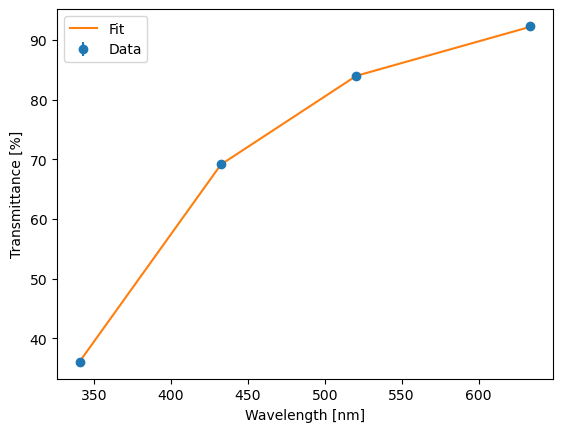

In [131]:
#Fit the data
def Hunt_Fit(W,A,C,B):
    return Hunt_Extended(W,A,C,B,t)
#Calculate chi2, dof, chi2/dof, and p-value 
p0=[1.0,0,0]

po_t,p_covariance=curve_fit(Hunt_Fit,W,T,p0=p0,sigma=dT,absolute_sigma=True)

A_Model,B_Model,C_Model=po_t
A_Error,B_Error,C_Error=np.sqrt(np.diag(p_covariance))

def Chi2(observed,expected,errors):
    return np.sum(((observed-expected)/errors)**2)
T_Fit=Hunt_Fit(W,A_Model,B_Model,C_Model)
Chi2_V=Chi2(T,T_Fit,dT)
DOF=len(T)-len(po_t)
Chi2_DOF=Chi2_V/DOF
p_V=1-chi2.cdf(Chi2_V,DOF)
print(f"The value of chi2 = {Chi2_V:.2f}\nThe value of chi2/dof = {Chi2_DOF:.2f}\np-value will be = {p_V:.4f}")
#plot the data and fit result on the same graph vs wavelength
plt.errorbar(W * 1000, T, yerr=dT, fmt='o', label='Data')  
plt.plot(W * 1000, T_Fit, '-', label='Fit')  
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmittance [%]')
plt.legend()
plt.show()





### Using your $Ct$ fit result we will look at the scattering length vs. wavelength
1. Define an array that spans from 200nm to 900nm and contains 700 points
2. We need to make sure that our units between $\lambda$ and $Ct$ are consistant, so make your wavelength array contain wavelengths in $\mu m$. E.G. $$ 0.001\cdot \lambda[nm] = \lambda[\mu m]$$
3. Now define a scattering length array, where the scattering length is defined as: $$\Lambda_{scatter} = \lambda/Ct/t,$$ where $t = 2.51 cm$, and is the tile thickness. This will give the $\Lambda_{scatter}$ in units of $cm$
4. Plot the scattering length vs. wavelength. When plotting us a log scale for the y-axis via. **axes.set_yscale('log')**

Text(0.5, 1.0, 'Scattering Length vs. Wavelength')

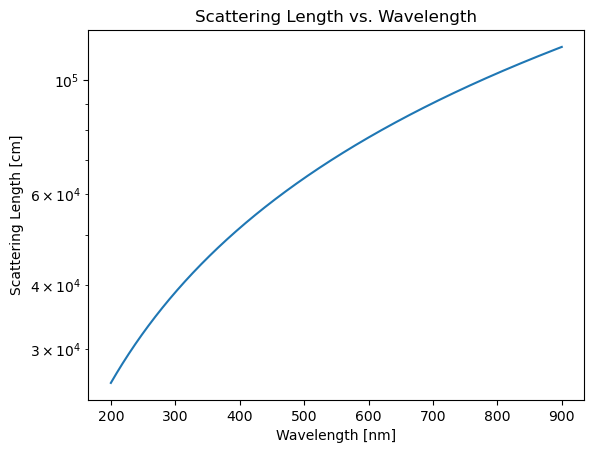

In [142]:
#create the new wavelegth and scattering length arrays
t = 2.51 #[cm]
W_range=np.linspace(200,900,700)*0.001
W_scattering=W_range/C_Model*t/t
#plot the scattering length vs. wavelength
fig,ax=plt.subplots()
ax.plot(W_range*1000,W_scattering)
ax.set_yscale('log')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Scattering Length [cm]')
ax.set_title('Scattering Length vs. Wavelength')